# This file will successfully create a dictionary, and JSON file, storing the JSON file as defined by the variable 'json_file' and creating a dictionary called 'all_data' which will include the entire results set.

In [1]:
myMBkey = ''

In [2]:
!pip install jupyternotify

In [3]:
# You may need to install, then load jupyternotify
# pip install jupyternotify
%load_ext jupyternotify


<IPython.core.display.Javascript object>

In [4]:

#Test notifications:
def finished():
    %notify -m "Congrats. your notifications work"
    print('finished')
finished()

<IPython.core.display.Javascript object>

finished


<div class="alert alert-info" role="alert">
 <font size="10">Optional parameters</font>
<br></br>
<font size="2"
<ul>
      <li><b>limit:</b> The maximum number of articles to return. This can be between 1 and 200. The default is 1.
format: The format of the response. Can be 'xml', 'json', 'rss', or 'atom'. The default is 'xml'.</li>
    <li><b>recent=true:</b> Use this if you only need results from within the last three days. This will make your query run faster.</li>
      <li><b>sequence_id:</b> This is used for paging through the results, which can be useful if you want to retrieve more than 200 articles for a query. For example, if the last <sequenceId> tag in a response is <sequenceId>215555160724</sequenceId>, then you can get the next page of results with this request: http://metabase.moreover.com/api/v10/searchArticles?key=(your_API_key)&query=(your_query)&sequence_id=215555160724</li>
      <li><b>filter_duplicates=true:</b> Used to filter out duplicate articles. An article is considered a duplicate of another article if the articles have the same title or very similar content. Articles which are considered duplicates will have the same <duplicateGroupId> value. filter_duplicates=true will remove duplicate articles from the response, only showing the originally harvested article, i.e. the earliest <harvestDate>. When using this, the <totalResults> tag may show a count higher than the actual number of results.</li>
      <li><b>duplicate_order=latest:</b> Instead of showing the article with the earliest <harvestDate> (the "oldest" article in the system), duplicate_order=latest will show the most recent article of a group of duplicate articles.</li>
      <li><b>sort:</b> Whether to sort the articles in ascending or descending order (ordered by the value in the <sequenceId> tag). Use sort=ascto sort in ascending order; use sort=desc to sort in descending order. The default is 'desc'. This works as expected with the sequence_id parameter: if you use limit=200&sequence_id=215555160724&sort=desc, you will get back the next 200 articles with a sequenceId less than 215555160724; if you use limit=200&sequence_id=215555160724&sort=asc, you will get back the next 200 articles with a sequenceId greater than 215555160724.</li>
      <li><b>relevance_percent:</b> Filter out less relevant articles using a whole number percentage between 1 and 100. A higher relevancy percentage will limit your results to more relevant articles. By default all matching articles are included in the results.</li>
  <li><b>sort_by_relevance=true:</b> Sort by relevanceScore instead of by sequenceId. Paging is not supported when using this parameter. The relevance of an article is based on a number of factors, including how many of the search keywords appear in the article, the number of occurrences of each keyword, how common or uncommon a keyword is (i.e., an uncommon word that appears in few documents will score higher than a common word that appears in many documents), and the total number of terms in the article text.</li>
  <li><b>show_relevance_score=true:</b> Adds a <relevanceScore> tag to each article which contains a number indicating how relevant the article is to the query. This score has no maximum value and does not have the same range of values as the "relevancy percentage" mentioned above. This score should only be used to compare articles within a single set of results.</li>
  <li><b>show_matching_keywords=true:</b> Adds a <matchingKeywords> tag to each article which contains which keywords from the query matched the article. Matching keywords will not be shown if the query contains wildcards.
</ul>

# Set the parameters of the Search:

In [5]:
# Input parameters

parameters = {'key': myMBkey , # my search key
              'limit': '200', #use 200 or less, no limit can result in only 1 value being returned.
              'format': 'json', 
              'filter_duplicates': 'True',
              'duplicate_order':'latest',
              'sort':'asc'
             }

In [8]:
parameters['query'] ='((voter NEAR/10 fraud) OR (election NEAR/10 fraud) OR (election NEAR/10 stolen*)'\
                    'OR (runoff NEAR/10 election) OR (trump NEAR/10 rally) OR (refusal NEAR/10 concede)'\
                    'OR (election NEAR/10 rigged) OR (election NEAR/10 integrity)'\
                    'OR (election NEAR/10 certification)'\
                    'OR (capitol NEAR/10 insurrection)'\
                    'OR (trump NEAR/10 impeachment)'\
                    'OR (election NEAR/10 threat*)'\
                    'OR (fraud* NEAR/10 ballots)'\
                    'OR (fraud NEAR/10 mail-in)'\
                    'OR (capitol NEAR/10 riot)'\
                    'OR (capitol NEAR/10 protest*)'\
                    'OR (capitol NEAR/10 prosecute*))'\
                    'AND sourceId:(57823 41518 52620 65770 111050 236260 45099 90590 252675 87882 227793 12626 35352 87349 36481 198290 216224 198282 198281 87708 153913 154062 153926 153934 153957 154057 198284 198233 33994 86392 567 71408 71409 82877 88053 48748 52922 75844 10568 75848 75849 75850 75853 39578 89186 34888 34881 34883 210073 51638 92198 92571 175644 276555 82326 48609 218222 272278 52909 80711 243679 19330 34274 147889 19295 12632 251468 6847 187018 52922 218222 272278 221564 42996 132107 222311 210640 65775)'\
                    'AND pubDate:[2020-07-29T00:00:00Z TO 2021-05-01T00:00:00Z]'\
                    


parameters['query']

'((voter NEAR/10 fraud) OR (election NEAR/10 fraud) OR (election NEAR/10 stolen*)OR (runoff NEAR/10 election) OR (trump NEAR/10 rally) OR (refusal NEAR/10 concede)OR (election NEAR/10 rigged) OR (election NEAR/10 integrity)OR (election NEAR/10 certification)OR (capitol NEAR/10 insurrection)OR (trump NEAR/10 impeachment)OR (election NEAR/10 threat*)OR (fraud* NEAR/10 ballots)OR (fraud NEAR/10 mail-in)OR (capitol NEAR/10 riot)OR (capitol NEAR/10 protest*)OR (capitol NEAR/10 prosecute*))AND sourceId:(57823 41518 52620 65770 111050 236260 45099 90590 252675 87882 227793 12626 35352 87349 36481 198290 216224 198282 198281 87708 153913 154062 153926 153934 153957 154057 198284 198233 33994 86392 567 71408 71409 82877 88053 48748 52922 75844 10568 75848 75849 75850 75853 39578 89186 34888 34881 34883 210073 51638 92198 92571 175644 276555 82326 48609 218222 272278 52909 80711 243679 19330 34274 147889 19295 12632 251468 6847 187018 52922 218222 272278 221564 42996 132107 222311 210640 65775)A

# Main functions:

In [9]:
####  THIS SEEMS TO WORK ####

import json
import requests
import time
from datetime import datetime

#Metabase url:
url = 'http://metabase.moreover.com/api/v10/searchArticles?'

#Metabase url for rate limits (with key):
r_url = 'https://metabase.moreover.com/api/v10/rateLimits?key='+myMBkey

# This variable determines where the JSON file will be stored:
json_file =r"TotalResults_full.json"


# used to call the API
def httpReq(p):
    r = requests.get(url, params=p)  
    if r.status_code == 200:
        data = r.json()
    else:
        print(r.text)
        print('An error occurred while attempting to retrieve data from the API.')   
        data = None
    return data
## End of Function

#checks for number of calls left within the minute
def checkratelimits():
    r = requests.get(r_url)
    if r.status_code == 200:
        data = r.json()
        for l in  data['rateLimits']:
            if l['unit']=='MINUTE':
                ratecheck = int(l['limit'])-int(l['counter'])
    return ratecheck
## End of Function

#This is an object used to count the number of calls available to make at one time:
class callCounter:
    def __init__(self):
        self.calls = checkratelimits()
        self.startMin = self.getTime()
        
    #grabs the current minute to be stored for time comparison
    def getTime(self):
        return datetime.now().minute
    
    #waits until the next minute
    def waitForNewMin(self):
        t = self.getTime()
        print(f"Waiting for a new Minute . . . current minute:{t}")
        while self.startMin == t:
            time.sleep(1)
            t = self.getTime()  
            
    # keeps track of number of calls left without going over API limit: 
    def setCalls(self):
        self.calls = self.calls - 1
        if self.calls < 1:
            self.endMin = self.getTime()
            if self.startMin != self.endMin:
                self.calls = checkratelimits()
            else:
                self.waitForNewMin()
                self.calls = checkratelimits()
            self.startMin = self.getTime() 
## End of Class

#storing the entire data set as a JSON, and returns a dictionary which is that dataset
def toJSON(myData):
    with open(json_file, 'w', encoding='utf8') as outfile:
        str_ = json.dumps(myData,
                          indent=4, sort_keys=False,
                          ensure_ascii=False)
        outfile.write(str_)
        print(f"file successfully written to: {json_file}")   #export file to json_file
## End of Function


#This function is used to consolidate all articles, if 'totalResults' > limit
def full_DataSet():
    parameters.pop('sequence_id',"")     #get rid of 'sequence_id' if it's there
    t_lst =[]                            #this will be the list of all articles
    x=1                                  #this will represent the number of articles left

    try:

        i=1                                               #i counts the number of loops occurring
        myCallCounter = callCounter()                     #create an instance of callCounter to determine calls left in minute
        while x > 0:                                      #run while x (number of articles remaining)
            myCallCounter.setCalls()                      #use callCounter object to determine calls left in minute  
            myData = httpReq(parameters)                  #call API
            t_lst = t_lst + myData['articles']            #add articles to t_lst  
            s_id = myData['articles'][-1]['sequenceId']   #find the last sequence id available
            parameters['sequence_id'] = s_id              #set sequence within parameters for next API call
            t =myData['totalResults']
            print(f'Remaining Results: {t} / sequence_id: {s_id} / number: {i}')   # print progress
            x = int(myData['totalResults'])-len(myData['articles'])  #update number of articles left to pull
            i += 1
        #End of 'while' loop    

        print("all done")                                 #print to notify user of completion  
        #total = len(t_lst)                               #total of all articles pulled, should equal original 'totalResults'



        myData['articles']= t_lst                   #set the total list of articles as the value in the key 'articles'
        myData['totalResults']= len(t_lst)          #make sure the 'totalResults' key is set to the original 'totalResults'
        return myData
        %notify -m "Congrats.The process has finished"

    #error handling:
    except Exception as e:
            print(f"error:{e}")
# End of Function

# This function is the 'main' function, gives the option to consolidate full_dataset, and whether or not to export JSON file
# essentially this function calls the other functions based on options chosen.
def apiCall(full_dataset=False, json = False):
    if full_dataset:
        api_data = full_DataSet()
    else:
        api_data = httpReq(parameters)
    if json:
        toJSON(api_data)
    return api_data
## End of Function

if __name__ == "__main__":
    all_data = apiCall(full_dataset=True, json = True)
    #print(len(all_data['articles'])) #should equal 'total results' (if full_dataset=True ) or 'limit' (full_dataset=False)

Remaining Results: 21210 / sequence_id: 1101161276047 / number: 1
Remaining Results: 21010 / sequence_id: 1102798136957 / number: 2
Remaining Results: 20810 / sequence_id: 1104874020860 / number: 3
Remaining Results: 20610 / sequence_id: 1106209715490 / number: 4
Remaining Results: 20410 / sequence_id: 1107623152174 / number: 5
Remaining Results: 20210 / sequence_id: 1109152881762 / number: 6
Remaining Results: 20010 / sequence_id: 1111098369732 / number: 7
Remaining Results: 19810 / sequence_id: 1112387200742 / number: 8
Remaining Results: 19610 / sequence_id: 1114298468201 / number: 9
Remaining Results: 19410 / sequence_id: 1115524808535 / number: 10
Remaining Results: 19210 / sequence_id: 1117146088385 / number: 11
Remaining Results: 19010 / sequence_id: 1118617599303 / number: 12
Remaining Results: 18810 / sequence_id: 1119901004909 / number: 13
Remaining Results: 18610 / sequence_id: 1121258374347 / number: 14
Remaining Results: 18410 / sequence_id: 1122296524757 / number: 15
Rema

In [10]:
#### Create a dataframe of top n subject terms from a given search:

import pandas as pd
## working with Index Terms:

n =  10


a_lst = all_data['articles']
uniqueTerms_lst = []
allTerms_lst = []

###Create a list of all subject terms (allTerms_lst)
for a in a_lst: 
    if 'indexTerms' in a:
        for t in a['indexTerms']:
            if 'domains' in t:
                if 'SUB' in t['domains']:
                    allTerms_lst.append(t['name'])
                    

###Create a list of all unique subject terms (uniqueTerms_lst)
uniqueTerms_lst =(list(set(allTerms_lst)))
            

myCols=[]

for x in uniqueTerms_lst:
    myList =[]
    myList.append(x)
    myList.append(allTerms_lst.count(x))
    myCols.append(myList)
df = pd.DataFrame(myCols,columns = ['name','occurrances'])
df =df.sort_values('occurrances',ascending=False)
df = df.head(n)
df

,name,occurrances
864,US PRESIDENTIAL CANDIDATES 2020,17961
1464,US PRESIDENTIAL CANDIDATES 2016,17064
2344,US PRESIDENTIAL CANDIDATES 2012,15599
1147,NEGATIVE PERSONAL NEWS,12658
178,US REPUBLICAN PARTY,11343
1933,LEGISLATIVE BODIES,10626
425,CAMPAIGNS & ELECTIONS,10519
1709,POLITICAL PARTIES,9947
2421,ELECTIONS,9360
194,US DEMOCRATIC PARTY,9184


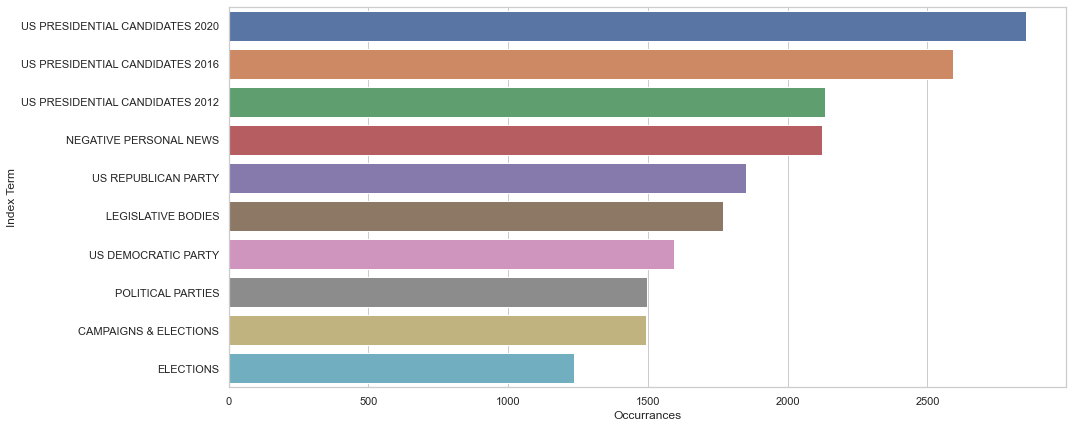

In [10]:
##HORIZONTAL BAR GRAPH OF THE TOP n SEARCH TERMS:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

colors = sns.color_palette('colorblind')

fig = plt.figure(figsize=(15, 7))
sns.set_theme(style="whitegrid")
x = df['occurrances']
y = df['name']
ax = sns.barplot(x=x, y=y)
ax.set_xlabel('Occurrances', fontsize=12)
ax.set_ylabel('Index Term', fontsize=12)
plt.show()

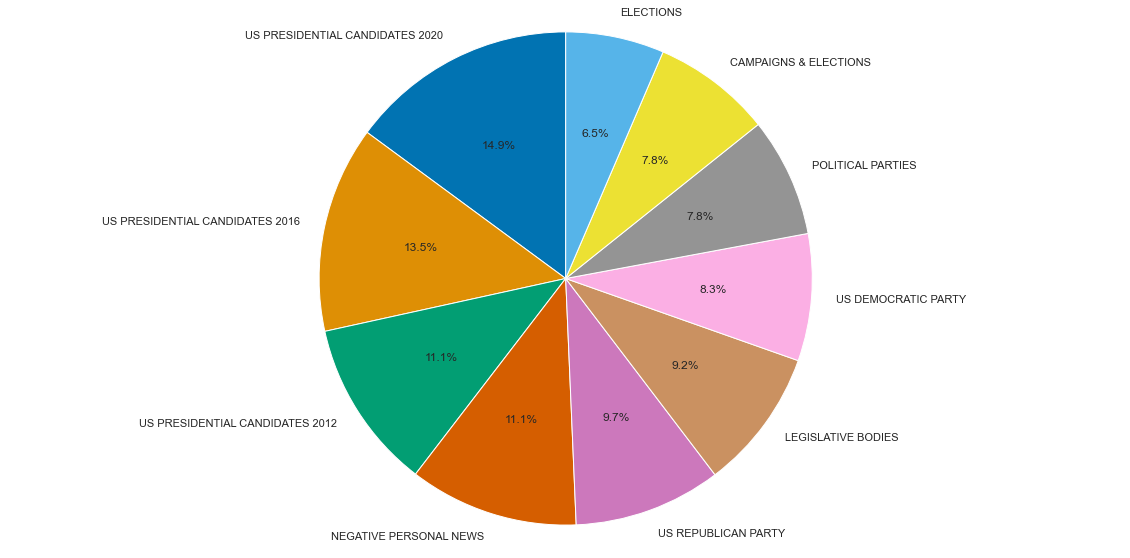

In [11]:
###PIE GRAPH OF THE TOP n industry TERMS

import matplotlib.pyplot as plt
import seaborn as sns


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df['name']
sizes = df['occurrances']

colors = sns.color_palette('colorblind')

fig = plt.figure(figsize=(20, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors =colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [12]:
len(all_data['articles']) #should equal 'total results'

3605